# G-Research Crypto Forecasting 
https://www.kaggle.com/competitions/g-research-crypto-forecasting/code

### Reference
- https://www.kaggle.com/competitions/g-research-crypto-forecasting/code
- https://www.kaggle.com/code/lucasmorin/on-line-feature-engineering

### 특성 공학

#### 암호화폐 데이터의 노이즈와 변동성을 고려할 때, 유의미한 특성을 생성하는 것이 핵심
- 지연 특성(Lag Features): 이전 시간대의 수익률(예: t-1, t-2 시점의 값)
- 이동 평균(Moving Averages): 5분, 15분 등 다양한 시간 단위의 평균 가격 또는 수익률
- 변동성 지표(Volatility): 일정 구간 내 가격 변동의 표준편차
- 기술적 지표: RSI, MACD와 같은 시장 분석 도구

##### 지연 특성(Lag Features): 이전 시간대의 수익률(예: t-1, t-2 시점의 값)
과거 시점의 데이터를 활용하여 현재 데이터를 예측하는 데 사용.
예를 들어, 이전 시간대의 종가(Close) 또는 수익률을 특성으로 사용
중요 이유: 암호화폐 가격은 종종 자기 상관성(autocorrelation)을 가지므로, 과거 가격이 미래 가격에 영향을 줄 수 있음
예시: 분 단위 데이터에서 lag_1은 1분전 종가, lag_2는 2분전 종가를 의미합니다.

##### 이동 평균(Moving Averages)
- 일정 기간 동안의 가격 데이터를 평활화하여 장기적인 추세를 파악하는데 사용
- 종류: SMA(Simple Moving Average), EMA(Exponential Moving Average)
    - 단순 이동 평균: 최근 n 개 기간의 평균
    - 지수 이동 평균: 최근 데이터에 더 많은 가중치를 두는 평균
- 중요 이유: 암호화폐 시장의 변동성을 줄이고 추세를 명확히 파악하는데 유용
- Close 가격 또는 수익률에 대해 5분, 15분 등의 시간 창(time window)으로 SMA와 EMA를 계산합니다.

##### 변동성 지표(Volatility Indicators)
- 변동성은 일정 기간 동안 가격 변동의 정도를 측정하며, 암호화폐의 높은 가격 변동성을 반영하는 데 필수적입니다.
- 계산 방법: 수익률 또는 가격 변화의 표준편차를 일정 시간 창(예: 15분)으로 계산합니다.
- 왜 중요한가?: 변동성은 거래 기회나 리스크를 나타내며, 모델이 시장의 불안정성을 이해하는 데 도움을 줍니다.
- 구현 방법: 수익률의 15분 롤링 표준편차를 계산합니다.

##### 기술적 지표(Technical Indicators)
- RSI(상대강도지수), MACD(Moving Average Convergence Divergence)는 시장의 모멘텀과 추세를 파악하는데 사용
- RSI: 가격 변화의 속도와 크기를 0~100 사이로 측정. RSI > 70은 과매수(overbought), RSI < 30은 과매도(oversold)를 나타냅니다.
- MACD: 12기간과 26기간 EMA의 차이를 계산하고, 9기간 신호선(signal line)을 통해 추세 변화를 감지합니다.
- 왜 중요한가?: 암호화폐의 급격한 가격 변동에서 모멘텀과 반전 시점을 포착하는 데 유용합니다.
- 구현 방법: ta 라이브러리를 사용하거나 수동으로 RSI와 MACD를 계산합니다.

##### 데이터 분할
- 암호화폐 시장은 시간이 지남에 따라 진화하므로, 실시간 예측을 시뮬레이션하기 위해 시간 기반 데이터 분할이 필요
- 시간 기반 분할 (Time-based split)
    - 훈련 데이터: 초기 데이터(예: 70%)를 사용해 모델을 학습.
    - 검증 데이터: 그 다음 연속된 시간 구간(예: 20%)를 사용해 하이퍼파라미터 튜닝.
    - 테스트 데이터: 가장 최근 데이터(예: 10%)를 최종 평가에 사용.
- 왜 중요한가?: 미래 데이터가 과거 예측에 영향을 주지 않도록 하여 데이터 누수(data leakage)를 방지
- 구현방법: timestamp를 기준으로 데이터를 정렬하고 순차적으로 분할
- 실시간 데이터 사용해 평가 -> 실험에서도 시간 기반 분할(Time-based split 적용)
- 훈련 데이터: 과거 데이터의 초기 부분(예: 70%)
- 검증 데이터: 이후 연속된 시간 구간(예: 20%)
- 테스트 데이터: 마지막 구간(예: 10%) 또는 별도 준비된 미래 데이터

In [ ]:
# 2차 시도 실패
# chunk_size = 1000   # 청크 크기 설정(시스템 메로이에 따라 조정 가능)
# chunk_iter = pd.read_csv(DATA_DIR + 'train.csv', encoding='utf-8', chunksize=chunk_size)
# df_train_chunks = []
# for chunk in chunk_iter:
#     df_train_chunks.append(chunk)
# df_train = pd.concat(df_train_chunks, ignore_index=True)

# 3차 시도 parquet 성공
# import dask.train_dfframe as dd
# train_df = dd.read_csv(train_df_DIR + 'train.csv', 
#                        dtype={'Asset_ID': 'int8', 'Close': 'float32', 'Open': 'float32', 
#                               'High': 'float32', 'Low': 'float32', 'Volume': 'float32', 
#                               'VWAP': 'float32', 'Target': 'float32'})
# print(train_df.info())
# print(train_df.head())

In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import MACD
import optuna
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 350)

In [ ]:
print(os.getcwd())
print(os.listdir())
BASE_DIR = os.getcwd()
DATA_DIR = BASE_DIR + "/data/g-research-crypto-forecasting/"

d:\workspace\hit_ml_dl
['.git', '.gitignore', 'actual_vs_predicted_returns.png', 'course', 'crypto01 copy.ipynb', 'crypto01.ipynb', 'crypto01.py', 'crypto_features.csv', 'data', 'energy', 'feature_correlation_heatmap.png', 'feature_correlation_heatmap_2.png', 'feature_correlation_heatmap_3.png', 'output.png', 'output_2.png', 'practice', 'quiz_01', 'README.md', 'resized_128.png', 'santander_analysis.png', 'santander_submission.csv', 'top_10_features.png', 'venv', 'ydata-profiling']


### test_df 분석
test_df는 실제로 예측을 수행해야 하는 데이터셋으로 이에 대한 구조를 파악해야
어떤 피처가 들어오는지, 어떤 전처리가 필요한지, 어떤 식으로 예측 결과를 채워야 하는지 판단할 수 있음

예측 후 결과를 sample_prediction_df['Target']에 채워 env.predict()로 제출해야 하므로
test_df -> sample_prediction_df -> predict() 흐름을 이해하는 것이 우선됨

In [ ]:
# 한 시점에 대한 자산(56개) 데이터 예시 제공용
test_df = pd.read_csv(DATA_DIR + 'example_test.csv', encoding='utf-8')
test_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,group_num,row_id
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,0,0
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,0,1
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,0,2
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0,3
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0,4


In [286]:
# numpy array 변환
timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP,row_id = (
    test_df[col].values for col in ['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume','VWAP','row_id']
)

# Asset_ID 기준 정렬 인덱스 생성 (오름차순)
order = np.argsort(Asset_ID)                                
print(order)
print(len(order))

[ 2 16 30 44 17 31 45  3 29 43  1 15 42 14 28  0  4 18 46 32 33 47 19  5
 21  7 49 35 34 48  6 20 36 50  8 22 23  9 51 37 52 38 10 24 27 13 41 55
 54 40 12 26 25 11 39 53]
56


In [ ]:
# 특정 시점에 누락된 자산(Asset_ID)이 있을 때
# 결측된 자산들의 데이터를 NaN 값으로 채워 넣어 전체 자산 개수를 유지하려는 의도

# 항상 다뤄야 할 자산 ID (0~55)
EXPECTED_ASSET_IDS = list(range(56))

# 실제 들어온 자산 ID
existing_ids = test_df["Asset_ID"].unique()
print(existing_ids)

# 누락된 자산 찾기
missing_ids = [i for i in EXPECTED_ASSET_IDS if i not in existing_ids]
if missing_ids:
    print(f"누락된 자산 ID: {missing_ids}")
else:
    print("누락된 자산이 없습니다.")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]


In [ ]:
# Base Feature Engineering
asset_details = pd.read_csv(DATA_DIR + 'asset_details.csv', encoding='utf-8')

# dict로 변환
dict_weights = dict(zip(asset_details['Asset_ID'], asset_details['Weight']))

# 전체 자산 ID 리스트 (0~55)
EXPECTED_ASSET_IDS = list(range(56))

# 56개 자산에 대한 weight 벡터 생성
# 누락된 Asset_ID NaN으로 넣고 추후 제거
weights = np.array([dict_weights.get(i, np.nan) for i in EXPECTED_ASSET_IDS])
print(weights)

[4.30406509 6.77992191 2.39789527 4.40671925 3.55534806 1.38629436
 5.89440283 2.07944154 1.09861229 2.39789527 1.09861229 1.60943791
 2.07944154 1.79175947        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]


In [307]:
# VWAP 값 중 무한대가 포함된 경우 Close와 Open의 평균값으로 대체하려는 처리
VWAP = np.where(np.isinf(VWAP),(C+O)/2,VWAP)

In [308]:
# 불필요하게 큰 데이터 타입을 줄여 메모리와 연산 최적화
# Count, row_id 이후 데이터 타입 변경(float32 -> int32)
dtype={'Asset_ID': 'int8', 'Count': 'float32', 'row_id': 'float32',
       'Open': 'float32', 'High': 'float32', 'Low': 'float32', 'Close': 'float32',
       'Volume': 'float32', 'VWAP': 'float32'}
test_df = test_df.astype(dtype)

# 왜 inf 처리하는가?
# VWAP(거래량 가중 평균 가격)은 계산 과정에서 Volume=0이면 0으로 나누기로 인해 inf 발생 가능
# inf가 모델 입력에 포함되면 훈련 불안정 / NaN 확산 등의 문제가 생김
# 따라서 **무한대 값을 의미 있는 수치(예: 중간가격)**으로 대체하여 안정성 확보

In [309]:
# Standardising Features
base = C
O = O/base
H = H/base
L = L/base
C = C/base
VWAP = VWAP/base
Price = base

# Using dollars 
Dollars = Volume * Price
Volume_per_trade = Volume/Count
Dollars_per_trade = Dollars/Count

# log returns and volatility estimators
log_ret = np.log(C/O)
GK_vol = (1 / 2 * np.log(H/L) ** 2 - (2 * np.log(2) - 1) * np.log(C / O) ** 2)
RS_vol = np.log(H/C)*np.log(H/O) + np.log(L/C)*np.log(L/O)

### Market Features

In [310]:
#get back missing values in weights 
weights = np.where(np.isnan(O),O,weights)
Market_Features = np.nansum(np.array([Count,O,H,L,C,Price,Volume,VWAP,Dollars,Volume_per_trade,Dollars_per_trade,log_ret,GK_vol,RS_vol])*weights/np.nansum(weights),axis=1)

### Time Features

In [312]:
def timestamp_to_date(timestamp):
    return(datetime.fromtimestamp(timestamp))

timestamp = timestamp_to_date(timestamp[0])

sin_month = (np.sin(2 * np.pi * timestamp.month/12))
cos_month = (np.cos(2 * np.pi * timestamp.month/12))
sin_day = (np.sin(2 * np.pi * timestamp.day/31))
cos_day = (np.cos(2 * np.pi * timestamp.day/31))
sin_hour = (np.sin(2 * np.pi * timestamp.hour/24))
cos_hour = (np.cos(2 * np.pi * timestamp.hour/24))
sin_minute = (np.sin(2 * np.pi * timestamp.minute/60))
cos_minute = (np.cos(2 * np.pi * timestamp.minute/60))

time_features = np.array((sin_month,cos_month,sin_day,cos_day,sin_hour,cos_hour,sin_minute,cos_minute))
time_features

array([ 1.22464680e-16, -1.00000000e+00,  4.85301963e-01, -8.74346616e-01,
        7.07106781e-01, -7.07106781e-01,  0.00000000e+00,  1.00000000e+00])

### Running Moving Average

In [ ]:
# Standard pandas moving average implementation would look like this:
# rw = 10000
# train_data_rolled = train_data.rolling(window=rw).mean()
# But that wouldn't be practical. One idea is to get values in memory, then perform the mean. This would be rather inefficient too. 
# A better approach is to keep track of the cumulated sum. Only adding the last instance / removing the further one in time at each time step.

In [314]:
import collections
from collections import deque

class RunningMean:
    def __init__(self, WIN_SIZE=20, n_size = 1):
        self.n = 0
        self.mean = np.zeros(n_size)
        self.cum_sum = 0
        self.past_value = 0
        self.WIN_SIZE = WIN_SIZE
        self.windows = collections.deque(maxlen=WIN_SIZE+1)
        
    def clear(self):
        self.n = 0
        self.windows.clear()

    def push(self, x):
        #currently fillna with past value, might want to change that
        x = fillna_npwhere(x, self.past_value)
        self.past_value = x
        
        self.windows.append(x)
        self.cum_sum += x
        
        if self.n < self.WIN_SIZE:
            self.n += 1
            self.mean = self.cum_sum / float(self.n)
            
        else:
            self.cum_sum -= self.windows.popleft()
            self.mean = self.cum_sum / float(self.WIN_SIZE)

    def get_mean(self):
        return self.mean if self.n else np.zeros(n_size)

    def __str__(self):
        return "Current window values: {}".format(list(self.windows))

# Temporary removing njit as it cause many bugs down the line
# Problems mainly due to data types, I have to find where I need to constraint types so as not to make njit angry
#@njit
def fillna_npwhere(array, values):
    if np.isnan(array.sum()):
        array = np.where(np.isnan(array), values, array)
    return array

### Moving Average Feature

In [315]:
%%time 

MA_lags = [2,5,15,30,60,120,300,1800,3750,10*24*60,30*24*60]


Features = np.transpose(np.array([Count,O,H,L,C,Price,Volume,VWAP,Dollars,Volume_per_trade,Dollars_per_trade,log_ret,GK_vol,RS_vol]))

#instantiation Moving average features dict
dict_RM = {}
dict_RM_M = {}
for lag in MA_lags:
    dict_RM[lag] = RunningMean(lag)
    dict_RM_M[lag] = RunningMean(lag)

for i in tqdm(range(10000)):
    
    MA_Features = []
    MA_Features_M  = [] 
    
    for lag in MA_lags:
        dict_RM[lag].push(Features)
        dict_RM_M[lag].push(Market_Features)
        
        MA_Features.append(dict_RM[lag].get_mean())
        MA_Features_M.append(dict_RM_M[lag].get_mean())
        
    MA_Features = np.concatenate(MA_Features,axis=1)
    MA_Features_M = np.concatenate(MA_Features_M)

100%|██████████| 10000/10000 [00:01<00:00, 5904.03it/s]

CPU times: total: 1.69 s
Wall time: 1.7 s


### Betas
For a lack of a better implementation I started with just two memories.

In [316]:
%%time 

beta_lags = [30,60,120,300,600,1800,3750,10*24*60,30*24*60]

#instantiation dict betas
dict_MM = {}
dict_Mr = {}
for lag in beta_lags:
    dict_MM[lag] = RunningMean(lag)
    dict_Mr[lag] = RunningMean(lag)

for i in tqdm(range(10000)):
    
    betas = []
    
    for lag in beta_lags:
        dict_MM[lag].push(Market_Features[11]**2)
        dict_Mr[lag].push(Market_Features[11]*Features[11])
        betas.append(np.expand_dims(dict_Mr[lag].get_mean()/dict_MM[lag].get_mean(),axis=1))
        
    betas = np.concatenate(betas,axis=1)

100%|██████████| 10000/10000 [00:01<00:00, 5974.44it/s]

CPU times: total: 1.67 s
Wall time: 1.68 s


### Putting it all together - cleaning and testing

In [318]:
%%time

# not building the weights each loops
asset_details = pd.read_csv(DATA_DIR + 'asset_details.csv', encoding='utf-8')

dict_weights = {}
for i in range(asset_details.shape[0]):
    dict_weights[asset_details.iloc[i,0]] = asset_details.iloc[i,1]
weigths = np.array([dict_weights[i] for i in range(14)])

# only needed when saving ?
dtype={'Asset_ID': 'int8', 'Count': 'int32', 'row_id': 'int32', 'Count': 'int32',
       'Open': 'float32', 'High': 'float32', 'Low': 'float32', 'Close': 'float32',
       'Volume': 'float32', 'VWAP': 'float32'}
#test_df = test_df.astype(dtype)

#refactoring functions:

def Clean_df(x):
    Asset_ID = x[:,1]
    timestamp = x[0,0]
    if len(Asset_ID)<14:
        missing_ID = [i for i in range(14) if i not in Asset_ID]
        for i in missing_ID:
            row = np.array((timestamp,i,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan))
            x = np.concatenate((x,np.expand_dims(row,axis=0)))
    x = x[np.argsort(x[:,1])]
    return (x[:,i] for i in range(x.shape[1]))

def Base_Feature_fn(timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP):
    VWAP = np.where(np.isinf(VWAP),(C+O)/2,VWAP)
    base = C
    O = O/base
    H = H/base
    L = L/base
    C = C/base
    VWAP = VWAP/base
    Price = base

    Dollars = Volume * Price
    Volume_per_trade = Volume/Count
    Dollars_per_trade = Dollars/Count

    log_ret = np.log(C/O)
    log_ret_H = np.log(H/C)
    log_ret_L = np.log(C/L)
    log_ret_VWAP = np.log(C/VWAP)
    
    GK_vol = (1 / 2 * np.log(H/L) ** 2 - (2 * np.log(2) - 1) * np.log(C/O) ** 2)
    RS_vol = np.log(H/C)*np.log(H/O) + np.log(L/C)*np.log(L/O)

    #return(np.transpose(np.array([Count,O,H,L,C,Price,Volume,VWAP,Dollars,Volume_per_trade,Dollars_per_trade,log_ret,GK_vol,RS_vol])))
    
    log_Count,log_Volume,log_Dollars,log_Volume_per_trade,log_Dollars_per_trade = np.log([Count,Volume,Dollars,Volume_per_trade,Dollars_per_trade])

    return(np.transpose(np.array([log_ret,log_ret_H,log_ret_L,log_ret_VWAP,GK_vol,RS_vol,log_Count,log_Volume,log_Dollars,log_Volume_per_trade,log_Dollars_per_trade])))

def Time_Feature_fn(timestamp):
    
    sin_month = (np.sin(2 * np.pi * timestamp.month/12))
    cos_month = (np.cos(2 * np.pi * timestamp.month/12))
    sin_day = (np.sin(2 * np.pi * timestamp.day/31))
    cos_day = (np.cos(2 * np.pi * timestamp.day/31))
    sin_hour = (np.sin(2 * np.pi * timestamp.hour/24))
    cos_hour = (np.cos(2 * np.pi * timestamp.hour/24))
    sin_minute = (np.sin(2 * np.pi * timestamp.minute/60))
    cos_minute = (np.cos(2 * np.pi * timestamp.minute/60))

    return(np.array((sin_month,cos_month,sin_day,cos_day,sin_hour,cos_hour,sin_minute,cos_minute)))

MA_lags = [2,5,15,30,60,120,300,1800,3750,10*24*60,30*24*60]

#instantiation Moving average features dict
dict_RM = {}
dict_RM_M = {}

for lag in MA_lags:
    dict_RM[lag] = RunningMean(lag)
    dict_RM_M[lag] = RunningMean(lag)
    
beta_lags = [60,300,1800,3750,10*24*60,30*24*60]

#instantiation dict betas
dict_MM = {}
dict_Mr = {}
for lag in beta_lags:
    dict_MM[lag] = RunningMean(lag)
    dict_Mr[lag] = RunningMean(lag)

for i in tqdm(range(10000)):
    
    timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP,row_id = Clean_df(test_df.values)
    
    # np.array([Count,O,H,L,C,Price,Volume,VWAP,Dollars,Volume_per_trade,Dollars_per_trade,log_ret,GK_vol,RS_vol])
    Features = Base_Feature_fn(timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP)
    
    #removing wieghts when data is missing so that they don't appears in market
    weigths = np.where(np.isnan(O),O,weigths)
    Market_Features = np.nansum(Features*np.expand_dims(weigths,axis=1)/np.nansum(weigths),axis=0)
    #Market_Features = np.tile(Market_Features,(14,1))
    
    #np.array((sin_month,cos_month,sin_day,cos_day,sin_hour,cos_hour,sin_minute,cos_minute))
    timestamp = timestamp_to_date(timestamp[0])
    Time_Features = Time_Feature_fn(timestamp)
    #Time_Features = np.tile(Time_Features,(14,1))
    
    MA_Features = []
    MA_Features_M  = [] 
    
    for lag in MA_lags:
        dict_RM[lag].push(Features)
        dict_RM_M[lag].push(Market_Features)
        
        MA_Features.append(dict_RM[lag].get_mean())
        MA_Features_M.append(dict_RM_M[lag].get_mean())
        
    MA_Features = np.concatenate(MA_Features,axis=1)
    MA_Features_M = np.concatenate(MA_Features_M)
    #MA_Features_M = np.tile(MA_Features_M,(14,1))
    
    betas = []
    
    for lag in beta_lags:
        dict_MM[lag].push(Market_Features[0]**2)
        dict_Mr[lag].push(Market_Features[0]*Features[:,0])
        betas.append(np.expand_dims(dict_Mr[lag].get_mean()/dict_MM[lag].get_mean(),axis=1))
        
    betas = np.concatenate(betas,axis=1)
    
    #print(values)
    #for data in [Features,np.tile(Market_Features,(14,1)),np.tile(Time_Features,(14,1)),MA_Features,np.tile(MA_Features_M,(14,1)),betas]:
        #print(data.shape)
    
    values = np.concatenate((Features,np.tile(Market_Features,(14,1)),np.tile(Time_Features,(14,1)),MA_Features,np.tile(MA_Features_M,(14,1)),betas),axis=1)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: total: 15.6 ms
Wall time: 10.4 ms


ValueError: too many values to unpack (expected 10)

In [ ]:
Features_names = ['log_ret','log_ret_H','log_ret_L','log_ret_VWAP','GK_vol','RS_vol','log_Count','log_Volume','log_Dollars','log_Volume_per_trade','log_Dollars_per_trade']
Market_Features_names = [s+'_M' for s in Features_names]
Time_Features_names = ['sin_month','cos_month','sin_day','cos_day','sin_hour','cos_hour','sin_minute','cos_minute']
MA_Features_names = [s+'_'+str(lag) for lag in MA_lags for s in Features_names ]
MA_Features_M_names = [s+'_'+str(lag) for lag in MA_lags for s in Market_Features_names]
betas_names = ['betas_'+str(lag) for lag in beta_lags]

All_names = Features_names + Market_Features_names + Time_Features_names + MA_Features_names + MA_Features_M_names + betas_names
df_values = pd.DataFrame(values, columns = All_names)

### Creating Training Folds
For the design of the folds, see discussion here: https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/288555

In [ ]:
DEBUG  = False
nrows = 100000 if DEBUG else None

dtype={'Asset_ID': 'int8', 'Count': 'int32', 'row_id': 'int32', 'Count': 'int32',
       'Open': 'float32', 'High': 'float32', 'Low': 'float32', 'Close': 'float32',
       'Volume': 'float32', 'VWAP': 'float32'}

train_df = pd.read_csv('../input/g-research-crypto-forecasting/train.csv', low_memory=False, dtype=dtype, nrows=nrows)
asset_details = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv')

#filter to avoid time leakage with the data 
filter_leakage = pd.to_datetime(train_df['timestamp'], unit='s') < '2021-06-13 00:00:00'
train_df = train_df[filter_leakage]

In [ ]:
# Generate the class/group data

import os
time_ids = train_df.timestamp.unique()

n_fold = 5
splits = 0.6
ntimes = len(time_ids)

embargo_train_test = 100 if DEBUG else 60*24*30
embargo_fold = 100 if DEBUG else 60*24*30

time_per_fold = (ntimes - 5*embargo_train_test - 5*embargo_fold)/5
train_len = splits*time_per_fold 
test_len = (1-splits)*time_per_fold

fold_start = [np.int(i*(len(time_ids)+1)/5) for i in range(6)]

for i in range(n_fold):
    time_folds = time_ids[fold_start[i]:fold_start[i+1]-1]
    df_fold = train_df[train_df.timestamp.isin(time_folds)]
    df_fold.to_parquet('df_fold_'+str(i)+'.parquet')
    
del train_df

dict_fold = {}

for fold in range(n_fold):
    print('fold:'+str(fold))
    
    df_fold = pd.read_parquet('df_fold_'+str(fold)+'.parquet')
    time_ids = df_fold.timestamp.unique()
    
    test_train_len = len(time_ids) - embargo_train_test - embargo_fold
    
    train_start = embargo_fold + 1
    train_end = embargo_fold + np.int(test_train_len*0.6) + 1
    test_start = embargo_fold + np.int(test_train_len*0.6) + embargo_train_test + 1
    test_end = len(df_fold.timestamp.unique())
    
    dict_fold['train_fold_'+str(fold)] = time_ids[train_start:train_end]
    dict_fold['test_fold_'+str(fold)] = time_ids[test_start:test_end]

del df_fold

In [319]:
%%time

import os
from random import random

sampling = 0.05

MA_lags = [2,5,15,30,60,120,300,1800,3750,2*3750,7*24*60]
beta_lags = [15,30,60,120,300,600,1800,3750,2*3750,7*24*60]

Features_names = ['log_ret','log_ret_H','log_ret_L','log_ret_VWAP','GK_vol','RS_vol','log_Count','log_Volume','log_Dollars','log_Volume_per_trade','log_Dollars_per_trade']
Market_Features_names = [s+'_M' for s in Features_names]
Time_Features_names = ['sin_month','cos_month','sin_day','cos_day','sin_hour','cos_hour','sin_minute','cos_minute']
MA_Features_names = [s+'_'+str(lag) for lag in MA_lags for s in Features_names ]
MA_Features_M_names = [s+'_'+str(lag) for lag in MA_lags for s in Market_Features_names]
betas_names = ['betas_'+str(lag) for lag in beta_lags]

All_names = Features_names + Market_Features_names + Time_Features_names + MA_Features_names + MA_Features_M_names + betas_names
#df_values = pd.DataFrame(values, columns = All_names)

for fold in range(n_fold):
    
    df_train_fold = pd.DataFrame()
    df_test_fold = pd.DataFrame()
    
    df_read = pd.read_parquet("df_fold_"+str(fold)+'.parquet')
    
    #instantiation Moving average features dict
    dict_RM = {}
    dict_RM_M = {}

    for lag in MA_lags:
        dict_RM[lag] = RunningMean(lag)
        dict_RM_M[lag] = RunningMean(lag)

    #instantiation dict betas
    dict_MM = {}
    dict_Mr = {}
    for lag in beta_lags:
        dict_MM[lag] = RunningMean(lag)
        dict_Mr[lag] = RunningMean(lag)

    f = ['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume','VWAP','Target']
    t = df_read['timestamp'].values
    ids, index = np.unique(t, return_index=True)

    Values = df_read[f].values
    splits = np.split(Values, index[1:])
    out = []

    for time_id, x in tqdm(zip(ids.tolist(), splits)):
        #df = Clean_df(pd.DataFrame(x,columns=f))

        #timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP,row_id = (test_df[col].values for col in ['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume','VWAP','row_id'])
        timestamp,Asset_ID,Count,O,H,L,C,Volume, VWAP,Target = Clean_df(x)

        # np.array([Count,O,H,L,C,Price,Volume,VWAP,Dollars,Volume_per_trade,Dollars_per_trade,log_ret,GK_vol,RS_vol])
        Features = Base_Feature_fn(timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP)

        #removing wieghts when data is missing so that they don't appears in market
        weigths_curr = np.where(np.isnan(O),O,weigths)
        Market_Features = np.nansum(Features*np.expand_dims(weigths_curr,axis=1)/np.nansum(weigths_curr),axis=0)
        #Market_Features = np.tile(Market_Features,(14,1))

        #np.array((sin_month,cos_month,sin_day,cos_day,sin_hour,cos_hour,sin_minute,cos_minute))
        time = timestamp_to_date(timestamp[0])
        Time_Features = Time_Feature_fn(time)
        #Time_Features = np.tile(Time_Features,(14,1))

        MA_Features = []
        MA_Features_M  = [] 

        for lag in MA_lags:
            dict_RM[lag].push(Features.copy())
            dict_RM_M[lag].push(Market_Features.copy())

            MA_Features.append(dict_RM[lag].get_mean())
            MA_Features_M.append(dict_RM_M[lag].get_mean())
        
        #standardise w/ 3750 lag
        ref = 3750
        
        for i in range(len(MA_lags)):
            if MA_lags[i] == ref:
                MA_ref = dict_RM[MA_lags[i]].get_mean().copy()
                MA_M_ref = dict_RM_M[MA_lags[i]].get_mean().copy()
        
        
                
                
        Features[:,-6:] = (Features[:,-6:] - MA_ref[:,-6:]).copy()
        Market_Features[-6:] = (Market_Features[-6:] - MA_M_ref[-6:]).copy()
                
        for i in range(len(MA_lags)):
            MA_Features[i][:,-6:] = (MA_Features[i][:,-6:] - MA_ref[:,-6:]).copy()
            MA_Features_M[i][-6:] = (MA_Features_M[i][-6:] - MA_M_ref[-6:]).copy()

        MA_Features_agg = np.concatenate(MA_Features,axis=1)
        MA_Features_M_agg = np.concatenate(MA_Features_M)

        betas = []

        for lag in beta_lags:
            dict_MM[lag].push(Market_Features[0]**2)
            dict_Mr[lag].push(Market_Features[0]*Features[:,0])
            betas.append(np.expand_dims(dict_Mr[lag].get_mean()/dict_MM[lag].get_mean(),axis=1))

        betas = np.concatenate(betas,axis=1)
        betas = np.nan_to_num(betas, nan=0., posinf=0., neginf=0.) 

        values = np.concatenate((Features,np.tile(Market_Features,(14,1)),np.tile(Time_Features,(14,1)),MA_Features_agg,np.tile(MA_Features_M_agg,(14,1)),betas, np.expand_dims(Target,axis=1)),axis=1)
        
        if random() < sampling:
            out.append(np.concatenate((np.expand_dims(timestamp,axis=1),np.expand_dims(Asset_ID,axis=1),np.float32(values)),axis=1))
    
    df_out = pd.DataFrame(np.concatenate(out), columns = ['timestamp','Asset_ID'] + All_names + ['Target']).astype({'timestamp': 'int64','Asset_ID': 'int64'})
    
    df_out = df_out[~np.isnan(df_out.Target)]

    ind_train = df_out.timestamp.isin(dict_fold['train_fold_'+str(fold)])
    ind_test = df_out.timestamp.isin(dict_fold['test_fold_'+str(fold)])
    
    df_train_fold = df_out[ind_train]
    df_test_fold = df_out[ind_test]
    
    df_train_fold.to_parquet('train_fold_'+str(fold)+'.parquet')
    df_test_fold.to_parquet('test_fold_'+str(fold)+'.parquet')
    
    pd.DataFrame(df_train_fold.mean(),columns=['mean']).to_parquet('mean_fold_'+str(fold)+'.parquet')
    pd.DataFrame(df_train_fold.std(),columns=['std']).to_parquet('std_fold_'+str(fold)+'.parquet')

CPU times: total: 0 ns
Wall time: 29 ms


FileNotFoundError: [Errno 2] No such file or directory: 'df_fold_0.parquet'

In [ ]:
# 대용량 CSV read 작업 중 메모리 오류 발생
# 로드 과정을 더 빠르게 할 수는 없을까?

# 훈련 데이터 로드
train_df = pd.read_csv(DATA_DIR + 'train.csv', encoding='utf-8') # nrows=400000
train_df.head()

In [ ]:
supplemental_df = pd.read_csv(DATA_DIR + 'supplemental_train.csv', encoding='utf-8')


# 훈련 데이터 결합
train_df = pd.concat([train_df, supplemental_df], ignore_index=True)

# 중복 제거, 정렬 (인덱스 상태는 무관)
train_df = train_df.drop_duplicates().sort_values(by=['Asset_ID', 'timestamp'])

# 정렬 후 인덱스 초기화
train_df = train_df.reset_index(drop=True)


In [277]:
# Get Data
timestamp,Asset_ID,Count,O,H,L,C,Volume,VWAP,row_id = (test_df[col].values for col in ['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume','VWAP','row_id'])

# 데이터 재정렬
order = np.argsort(Asset_ID)
order

array([ 2, 16, 30, 44, 17, 31, 45,  3, 29, 43,  1, 15, 42, 14, 28,  0,  4,
       18, 46, 32, 33, 47, 19,  5, 21,  7, 49, 35, 34, 48,  6, 20, 36, 50,
        8, 22, 23,  9, 51, 37, 52, 38, 10, 24, 27, 13, 41, 55, 54, 40, 12,
       26, 25, 11, 39, 53])

In [ ]:
# 발생한 이슈
# Dask GroupBy 제한: GroupBy 객체는 Pandas와 달리 fillna를 직접 지원하지 않음
# fillna는 DataFrame 수준에서 적용되어야 함

# 결측치 제거
print(train_df.isna().sum().to_string()) # .isna == .isnull

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       753261


In [ ]:
print(train_df.columns)
train_df = train_df.drop(columns=['Target'])

Index(['timestamp', 'Asset_ID', 'Count', 'Open', 'High', 'Low', 'Close',
       'Volume', 'VWAP', 'Target'],
      dtype='object')


In [253]:
# 정렬 전 인덱스 제거
train_df = train_df.reset_index(drop=True)

# 정렬
train_df = train_df.sort_values(['Asset_ID', 'timestamp'])

# groupby 후 선형 보간
train_df = train_df.groupby('Asset_ID').apply(lambda x: x.interpolate(method='linear'))

# 멀티 인덱스 제거
train_df.reset_index(drop=True, inplace=True)

# 결과 확인
print(train_df.head())

# 결측치 확인
missing_counts_after = train_df.isna().sum()
print("(after) 결측치 수:\n", missing_counts_after.to_string())

C:\Users\wsm\AppData\Local\Temp\ipykernel_24884\3078661307.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('Asset_ID').apply(lambda x: x.interpolate(method='linear'))


    timestamp  Asset_ID  Count    Open    High     Low   Close   Volume  \
0  1514764860         0    5.0  8.5300  8.5300  8.5300  8.5300    78.38   
1  1514764920         0    7.0  8.5300  8.5300  8.5145  8.5145    71.39   
2  1514764980         0   45.0  8.5065  8.5299  8.4848  8.4848  1546.82   
3  1514765040         0   14.0  8.5009  8.5066  8.4744  8.5009   125.80   
4  1514765100         0    5.0  8.5007  8.5007  8.4560  8.4560   125.01   

       VWAP  
0  8.530000  
1  8.520215  
2  8.501394  
3  8.479810  
4  8.458435  
(after) 결측치 수:
 timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0


In [ ]:
# 데이터 정렬
train_df = train_df.sort_values(by=['Asset_ID', 'timestamp'])

# 특성 공학 함수
def compute_features(df):
    """
    자산별로 특성 공학을 수행
    Args: df - pandas DataFrame
    Returns: 특성이 추가된 DataFrame
    """
    print(f"Before compute_features - Columns: {df.columns.tolist()}")
    if 'Close' not in df.columns:
        raise KeyError(f"Column 'Close' not found in DataFrame. Available columns: {df.columns.tolist()}")

    df = df.copy()

    # 1. 지연 특성 (Lag Features)
    df['lag_1_close'] = df['Close'].shift(1)
    df['returns'] = df['Close'].pct_change()
    df['log_returns'] = np.log1p(df['returns'])
    df['lag_1_returns'] = df['returns'].shift(1)

    # 2. 이동 평균 (Moving Averages)
    df['sma_5'] = df['Close'].rolling(window=5, min_periods=1).mean()
    df['ema_5'] = df['Close'].ewm(span=5, adjust=False).mean()

    # 3. 변동성 지표 (Volatility Indicators)
    df['volatility_15'] = df['returns'].rolling(window=15, min_periods=1).std()
    df['high_low_spread'] = df['High'] - df['Low']
    bb = BollingerBands(close=df['Close'], window=20, window_dev=2, fillna=True)
    df['bb_high'] = bb.bollinger_hband()
    df['bb_low'] = bb.bollinger_lband()

    # 4. 기술적 지표 (Technical Indicators)
    rsi = RSIIndicator(close=df['Close'], window=14, fillna=True)
    df['rsi'] = rsi.rsi()
    macd = MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True)
    df['macd'] = macd.macd()
    df['macd_signal'] = macd.macd_signal()
    df['macd_diff'] = macd.macd_diff()

    # 5. 가격 스프레드 (Price Spreads)
    df['close_open_spread'] = df['Close'] - df['Open']

    # 6. 거래량 기반 특성 (Volume-based Features)
    df['volume_log'] = np.log1p(df['Volume'])
    df['volume_roll_mean_5'] = df['Volume'].rolling(window=5, min_periods=1).mean()

    # 다중공선성 완화 (차등 학습)
    df['close_lag1_diff'] = df['Close'] - df['lag_1_close']
    df['close_sma5_ratio'] = df['Close'] / df['sma_5'] - 1

    print(f"After compute_features - Columns: {df.columns.tolist()}")
    return df

In [ ]:
# 자산별 데이터 분리 및 특성 공학
asset_dfs = {}
for asset_id in train_df['Asset_ID'].unique():
    asset_df = train_df[train_df['Asset_ID'] == asset_id].copy()
    asset_df = compute_features(asset_df)
    asset_df = asset_df.dropna()  # 결측치 제거
    asset_dfs[asset_id] = asset_df

In [ ]:
# 자산별 데이터 분할 (예: 70-20-10)
split_results = {}
for asset_id, df in asset_dfs.items():
    total_len = len(df)
    train_size = int(0.7 * total_len)
    val_size = int(0.2 * total_len)
    test_size = total_len - train_size - val_size

    train_data = df.iloc[:train_size]
    val_data = df.iloc[train_size:train_size + val_size]
    test_data = df.iloc[train_size + val_size:]

    # 스케일링 적용
    scaler_price = MinMaxScaler()
    scaler_volume = RobustScaler()
    scaler_target = StandardScaler()

    price_cols = ['Open', 'High', 'Low', 'Close', 'VWAP']
    volume_cols = ['Volume', 'Count']

    train_data[price_cols] = scaler_price.fit_transform(train_data[price_cols])
    train_data[volume_cols] = scaler_volume.fit_transform(np.log1p(train_data[volume_cols]))
    train_data['target'] = scaler_target.fit_transform(train_data[['target']])

    val_data[price_cols] = scaler_price.transform(val_data[price_cols])
    val_data[volume_cols] = scaler_volume.transform(np.log1p(val_data[volume_cols]))
    val_data['target'] = scaler_target.transform(val_data[['target']])

    test_data[price_cols] = scaler_price.transform(test_data[price_cols])
    test_data[volume_cols] = scaler_volume.transform(np.log1p(test_data[volume_cols]))
    test_data['target'] = scaler_target.transform(test_data[['target']])

    split_results[asset_id] = {'train': train_data, 'val': val_data, 'test': test_data}

    print(f"Asset {asset_id} - Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

In [ ]:
# 자산별 특성 공학 적용 (include_groups 제거)
train_df = train_df.groupby('Asset_ID', group_keys=False).apply(compute_features)
test_df = test_df.groupby('Asset_ID', group_keys=False).apply(compute_features)

# 결측치 처리
train_df = train_df.groupby('Asset_ID').apply(lambda x: x.interpolate(method='linear', limit_direction='both')).reset_index(drop=True)
test_df = test_df.groupby('Asset_ID').apply(lambda x: x.interpolate(method='linear', limit_direction='both')).reset_index(drop=True)
train_df = train_df.fillna(method='ffill').dropna()
test_df = test_df.fillna(method='ffill').dropna()

# 타겟 변수 생성 (훈련 데이터에만 적용)
train_df['target'] = train_df['returns'].shift(-1)
train_df = train_df.dropna()

# 다중공선성 제거 (Close 제외)
correlation_matrix = train_df.select_dtypes(include=[np.number]).corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85) and column != 'Close']
train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)

# 특성 선택
features = [col for col in train_df.columns if col not in ['timestamp', 'Asset_ID', 'Open', 'High', 'Low', 'Volume', 'VWAP', 'target']]

In [262]:
# 시간 기반 데이터 분할 (train_df에 적용)
train_df['datetime'] = pd.to_datetime(train_df['timestamp'], unit='s')
train_df = train_df.sort_values('timestamp')
total_len = len(train_df)
train_size = int(0.7 * total_len)
val_size = int(0.2 * total_len)
test_size = total_len - train_size - val_size

train_data = train_df.iloc[:train_size]
val_data = train_df.iloc[train_size:train_size + val_size]
test_data = train_df.iloc[train_size + val_size:]

In [ ]:
# 스케일링 적용
scaler_price = MinMaxScaler()
scaler_volume = RobustScaler()
scaler_target = StandardScaler()

price_cols = ['Open', 'High', 'Low', 'Close', 'VWAP']
volume_cols = ['Volume', 'Count']

In [ ]:
# 훈련 데이터 피팅 및 변환
train_data[price_cols] = scaler_price.fit_transform(train_data[price_cols])
train_data[volume_cols] = scaler_volume.fit_transform(np.log1p(train_data[volume_cols]))
train_data['target'] = scaler_target.fit_transform(train_data[['target']])

# 검증/테스트 데이터 변환
val_data[price_cols] = scaler_price.transform(val_data[price_cols])
val_data[volume_cols] = scaler_volume.transform(np.log1p(val_data[volume_cols]))
val_data['target'] = scaler_target.transform(val_data[['target']])

test_data[price_cols] = scaler_price.transform(test_data[price_cols])
test_data[volume_cols] = scaler_volume.transform(np.log1p(test_data[volume_cols]))
test_data['target'] = scaler_target.transform(test_data[['target']])

In [ ]:
# 목적: 암호화폐 자산별 가격 상승여부 예측 → 분류(0/1) or 회귀 모두 가능
# 아래 예시는 회귀 (target: 수익률 등)

def objective(trial):
    param = {
        'tree_method': 'gpu_hist',          # GPU 연산 사용
        'predictor': 'gpu_predictor',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 42,
        'objective': 'reg:squarederror',   # 회귀용. 분류일 경우 'binary:logistic'
        'verbosity': 0
    }

    model = xgb.XGBRegressor(**param)
    model.fit(
        train_data[features], train_data['target'],
        eval_set=[(val_data[features], val_data['target'])],
        early_stopping_rounds=10,
        verbose=False
    )
    pred = model.predict(val_data[features])
    rmse = np.sqrt(mean_squared_error(val_data['target'], pred))
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(f"Best parameters: {study.best_params}")
print(f"Best RMSE: {study.best_value:.4f}")

In [ ]:
best_params = study.best_params
best_params['tree_method'] = 'gpu_hist'
best_params['predictor'] = 'gpu_predictor'
best_params['objective'] = 'reg:squarederror'  # or 'binary:logistic' for classification

model = xgb.XGBRegressor(**best_params)
model.fit(train_data[features], train_data['target'])

In [ ]:
from sklearn.model_selection import KFold

# K-Fold 교차 검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, val_idx in kf.split(train_data):
    X_train, X_val = train_data.iloc[train_idx][features], train_data.iloc[val_idx][features]
    y_train, y_val = train_data.iloc[train_idx]['target'], train_data.iloc[val_idx]['target']
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    cv_scores.append(np.sqrt(mean_squared_error(y_val, val_pred)))

print(f"Cross-Validation RMSE: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

In [ ]:
# 예측
train_pred = model.predict(train_data[features])
val_pred = model.predict(val_data[features])
test_pred = model.predict(test_data[features])

train_rmse = np.sqrt(mean_squared_error(train_data['target'], train_pred))
val_rmse = np.sqrt(mean_squared_error(val_data['target'], val_pred))
test_rmse = np.sqrt(mean_squared_error(test_data['target'], test_pred))
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 0.0030
Validation RMSE: 0.0031
Test RMSE: 0.0025


In [ ]:
# 시각화 개선
# 1. Bollinger Bands
print(f"Available columns for visualization: {train_df.columns.tolist()}")  # 디버깅용
if 'Close' in train_df.columns and 'bb_high' in train_df.columns and 'bb_low' in train_df.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(train_df['datetime'], train_df['Close'], label='Close Price', color='green')
    plt.plot(train_df['datetime'], train_df['bb_high'], label='Upper Band', color='blue', linestyle='--')
    plt.plot(train_df['datetime'], train_df['bb_low'], label='Lower Band', color='red', linestyle='--')
    plt.title('Bollinger Bands (2025-07-30 20:58 KST)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'Close', 'bb_high', or 'bb_low' columns are missing. Visualization skipped.")

Available columns for visualization: ['timestamp', 'Asset_ID', 'Count', 'Open', 'Close', 'Volume', 'returns', 'lag_1_returns', 'volatility_15', 'high_low_spread', 'rsi', 'macd', 'macd_diff', 'close_open_spread', 'volume_log', 'close_sma5_ratio', 'target', 'datetime']


C:\Users\wsm\AppData\Local\Temp\ipykernel_24884\2967819601.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\workspace\hit_ml_dl\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


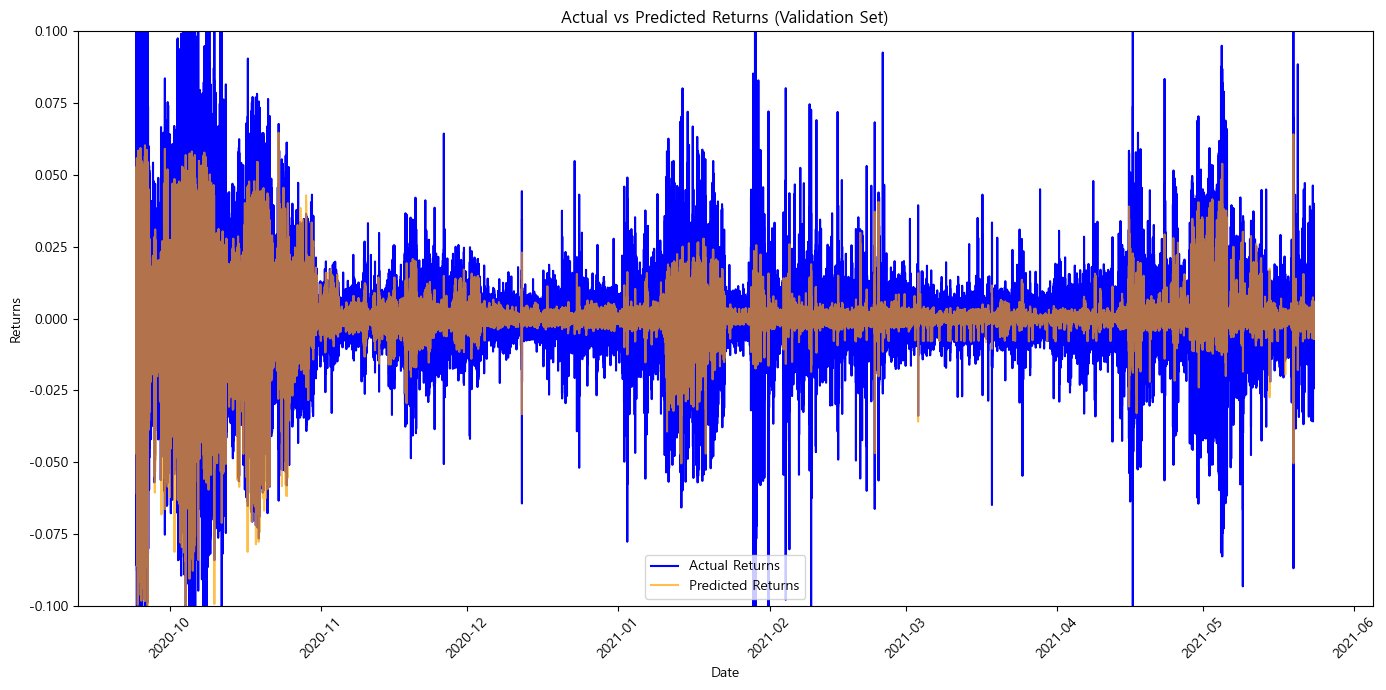

In [ ]:
# 2. Actual vs Predicted Returns
plt.figure(figsize=(14, 7))
plt.plot(val_data['datetime'], val_data['target'], label='Actual Returns', color='blue')
plt.plot(val_data['datetime'], val_pred, label='Predicted Returns', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Returns (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.ylim(-0.1, 0.1)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

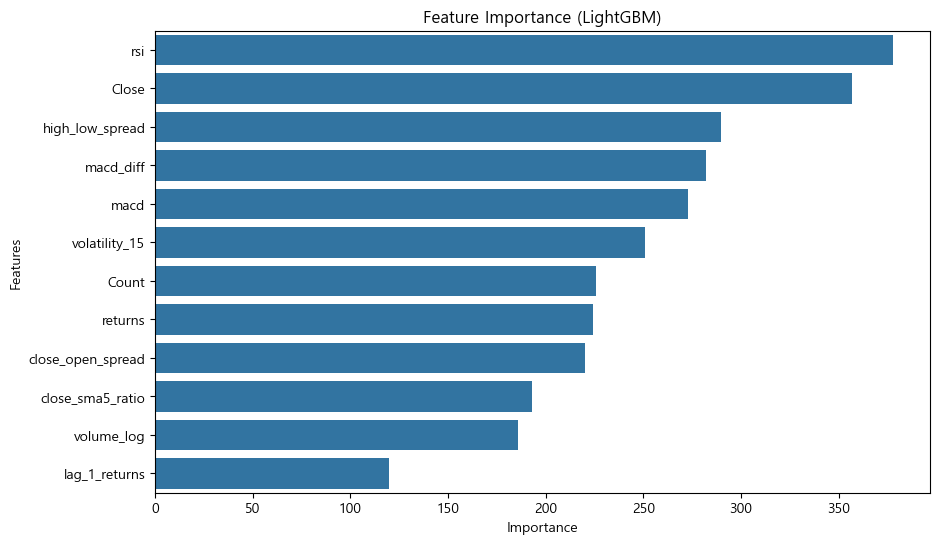

In [ ]:
# 3. Feature Importance
feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()